In [208]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import random
from sklearn import linear_model, metrics, preprocessing
import mord
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler

In [233]:
data = pd.read_pickle('masterPitchDataFrame.pkl')
# rename columns                                                                             1                  2             3             4                     5                6                     7                8            9       10       11        12       13       14       15       16        17        18          19         20         21        22                   23              24                  25                 26                27                28               29                30                 31                  32                      33                34 
data.columns = ['chorus_num', 'year','rank','min pitch','max pitch','semitones','zero crossing rate','energy','entropy of energy','spectral centroid','spectral spread','spectral entropy','spectral flux','spectral rolloff','MFCC 1','MFCC 2','MFCC 3', 'MFCC 4','MFCC 5','MFCC 6','MFCC 7','MFCC 8', 'MFCC 9', 'MFCC 10', 'MFCC 11', 'MFCC 12','MFCC 13','chroma vector 1','chroma vector 2','chroma vector 3','chroma vector 4', 'chroma vector 5','chroma vector 6','chroma vector 7','chroma vector 8','chroma vector 9','chroma vector 10','chroma vector 11','chroma vector 12','chroma deviation']
#print data.head(10)

In [241]:
#separate by chorus number to see if it makes a difference 
data1 = data[(data.chorus_num == 't1')]
data2 = data[(data.chorus_num == 't2')]
no_year_data = data.drop('year', axis = 1) #also try t1 and t2 w/o years
no_year_data1= no_year_data[(data.chorus_num == 't1')]
no_year_data2= no_year_data[(data.chorus_num == 't2')]

In [242]:
#features = list (set(list(data.columns))-set(target_col))

columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["rank","chorus_num"]]

columns1 = no_year_data.columns.tolist()
columns1 = [c for c in columns1 if c not in ["rank","chorus_num"]]
#print data1.columns


#chorus 1
y = data1["rank"]#.astype(float)
X = data1[columns]
#chorus 2
y2 = data2["rank"]
X2 = data2[columns]
#all chorus, no year
y3 = no_year_data["rank"]
X3 = no_year_data[columns1]
#chorus 1, no year
y4 = no_year_data1["rank"]
X4 = no_year_data1[columns1]
#chorus 2, no year
y5 = no_year_data2["rank"]
X5 = no_year_data2[columns1]

In [243]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X2 = scaler.fit_transform(X2)

X3 = scaler.fit_transform(X3)

X4 = scaler.fit_transform(X4)

X5 = scaler.fit_transform(X5)
#y = scaler.fit_transform(y)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size= .70 )

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
#dir(mord.metrics)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, train_size= .70 )

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, train_size= .70 )

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, train_size= .70 )

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.30, train_size= .70 )


(390, 38) (390,)
(168, 38) (168,)


cross-Validated scores:  [ -700.59270046  -855.43273669 -1042.39955153  -921.7468602   -735.91356788
  -873.40705492 -1135.73099796  -991.01243831  -986.75376905 -1238.82406221]


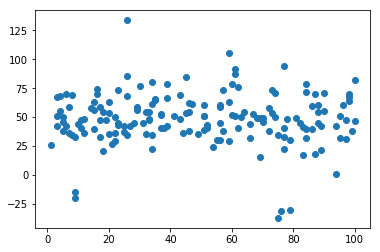

Cross-Predicted Accuracy -0.641007869946


In [247]:
model = linear_model.LinearRegression()

reg_scores = cross_val_score(model, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "cross-Validated scores: ", reg_scores

reg_predictions = cross_val_predict(model, X_test,y_test,cv = 10)

plt.scatter(y_test,reg_predictions)
plt.show()

reg_accuracy = metrics.r2_score(y_test,reg_predictions)
print "Cross-Predicted Accuracy", reg_accuracy 

Chorus 1. cross-Validated scores:  [-1144.48728492  -990.30229027 -1094.99420673  -595.42647849  -913.03284215
  -860.08485795 -1195.47516909 -1022.90515347  -966.76415984 -1118.85010216]


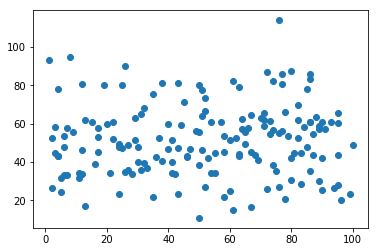

Cross-Predicted Accuracy -0.21673057561
Chorus 2. cross-Validated scores:  [ -790.22774618  -884.37329729  -885.15770737  -901.1307886   -806.42149345
  -810.04507089  -894.79992043 -1149.70976518  -816.8420739   -798.16266998]


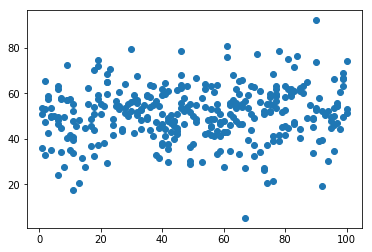

Cross-Predicted Accuracy -0.0889314984901
Chorus 1, no year. cross-Validated scores:  [ -988.60127072  -966.92825544  -808.12910629  -968.62112771  -923.35816522
  -957.80245942  -964.97066145  -812.18662011 -1064.16810142  -922.96176723]


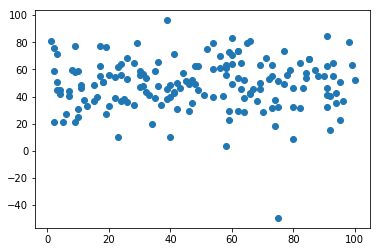

Cross-Predicted Accuracy -0.416569125802
Chorus 2, no year. cross-Validated scores:  [ -923.32769261  -635.06691391  -866.19706818 -1302.97597339 -1300.82889814
  -689.06280177  -995.86652057  -691.97155782  -632.03322647 -1224.16828039]


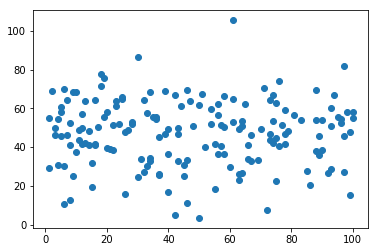

Cross-Predicted Accuracy -0.341129040686


In [251]:
reg_scores2 = cross_val_score(model, X2_train, y2_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 1. cross-Validated scores: ", reg_scores2

reg_predictions2 = cross_val_predict(model, X2_test,y2_test,cv = 10)

plt.scatter(y_test,reg_predictions2)
plt.show()

reg_accuracy2 = metrics.r2_score(y2_test,reg_predictions2)
print "Cross-Predicted Accuracy", reg_accuracy2 



#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores3 = cross_val_score(model, X3_train, y3_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 2. cross-Validated scores: ", reg_scores3

reg_predictions3 = cross_val_predict(model, X3_test,y3_test,cv = 10)

plt.scatter(y3_test,reg_predictions3)
plt.show()

reg_accuracy3 = metrics.r2_score(y3_test,reg_predictions3)
print "Cross-Predicted Accuracy", reg_accuracy3



#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores4 = cross_val_score(model, X4_train, y4_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 1, no year. cross-Validated scores: ", reg_scores4

reg_predictions4 = cross_val_predict(model, X4_test,y4_test,cv = 10)

plt.scatter(y4_test,reg_predictions4)
plt.show()

reg_accuracy4 = metrics.r2_score(y4_test,reg_predictions4)
print "Cross-Predicted Accuracy", reg_accuracy4


#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores5 = cross_val_score(model, X5_train, y5_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 2, no year. cross-Validated scores: ", reg_scores5

reg_predictions5 = cross_val_predict(model, X5_test,y5_test,cv = 10)

plt.scatter(y5_test,reg_predictions5)
plt.show()

reg_accuracy5 = metrics.r2_score(y5_test,reg_predictions5)
print "Cross-Predicted Accuracy", reg_accuracy5

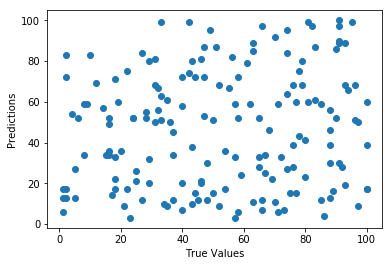

Mean Absolute Error of LogisticRegression: 31.3511904762


In [218]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf1 = linear_model.LogisticRegression(solver='liblinear')#solver='lbfgs')
clf1.fit(X_train, y_train)

predic = clf1.predict(X_test)

plt.scatter(y_test,predic)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print('Mean Absolute Error of LogisticRegression: %s' %
metrics.mean_absolute_error(clf1.predict(X_test), y_test))

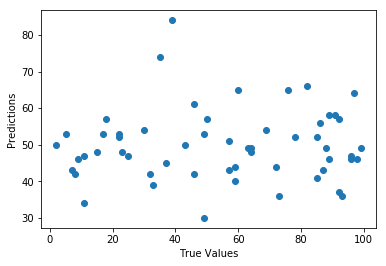

 ORD Score: -1019.51785714


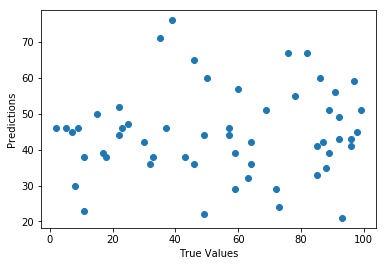

In [196]:
#ORDRID * * * * * * * *
ordinalridge = mord.OrdinalRidge(max_iter=1000)
lad = mord.LAD(max_iter=1000)

ordinalridge.fit(X_train, y_train)

pred = ordinalridge.predict(X_test)

plt.scatter(y_test,pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print "ORD Score:", ordinalridge.score(X_test,y_test)
#print "Score:", mean_absolute_error()

#LAD * * * * * * * * * *
lad.fit(X_train,y_train)

pred1 = lad.predict(X_test)

plt.scatter(y_test,pred1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

#cross val score for training
#fit training values up here.

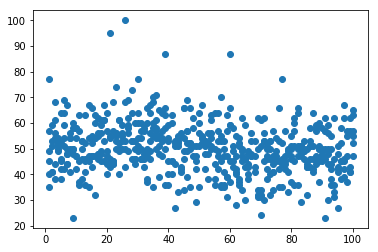

Cross-Predicted Accuracy -0.248922903114


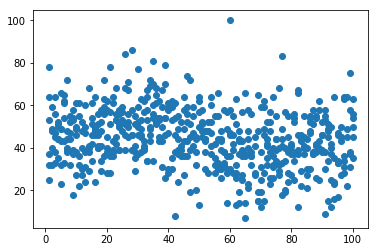

LAD Cross-Predicted Accuracy -0.480274898044


In [197]:
#ordinalRide
scores = cross_val_score(ordinalridge, X, y, cv=10,scoring='neg_mean_absolute_error')
#scoring='neg_mean_squared_error'
#print "cross-Validated scores: ", scores

predictions = cross_val_predict(ordinalridge, X,y,cv = 10)

plt.scatter(y,predictions)
plt.show()

accuracy = metrics.r2_score(y,predictions)
print "Cross-Predicted Accuracy", accuracy 

#LAD
lad_scores = cross_val_score(lad, X, y, cv=10,scoring='neg_mean_absolute_error')
#print "LAD cross-Validated scores: ", lad_scores

predictions1 = cross_val_predict(lad, X,y,cv = 10)

plt.scatter(y,predictions1)
plt.show()

accuracy1 = metrics.r2_score(y,predictions1)
print "LAD Cross-Predicted Accuracy", accuracy1 


Index([u'chorus_num', u'year', u'rank', u'min pitch', u'max pitch',
       u'semitones', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9',
       u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19',
       u'20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34'],
      dtype='object')


NameError: name 'X' is not defined

In [9]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
#cross val score here for training data
cv_results = cross_val_score(model, x, y, scoring='')
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [10]:
predictions = rf.predict(X_test)
#there should be a way to compare X_test and y_test.


-0.0749744033187


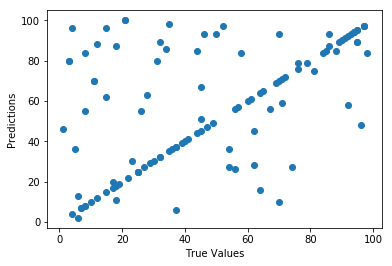

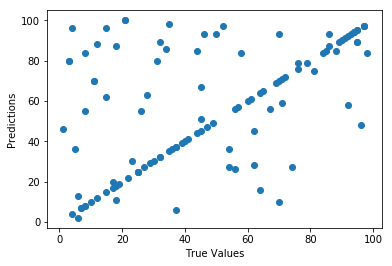

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

plt.scatter(y_test, predictions)

score = r2_score(y_test, predictions)

print score

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [12]:
print 'Score:', rf.score(X_test, y_test)

Score: 0.508928571429


In [13]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=20, random_state=None, shuffle=False)

KFold(n_splits=10, random_state=None, shuffle=False)


KFold(n_splits=20, random_state=None, shuffle=False)

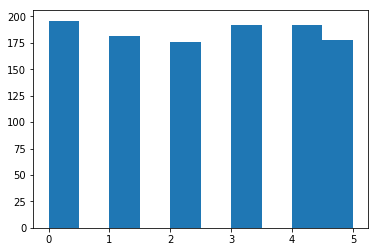

In [19]:
plt.hist(data['year'], bins = 10)
plt.show()

In [ ]:
for train_index, test_index in kf.split(X):
 print('TRAIN:', train_index, 'TEST:', test_index)
 X_train.values, X_test = X[train_index], X[test_index]
 y_train.values, y_test = y[train_index], y[test_index]

In [ ]:
#create label encoders for categorical features
# for var in cat_cols:

# enc = OneHotEncoder()
# data1[var] = enc.fit_transform(data1[var])#.astype('str'))

# le = LabelEncoder()
# new_cat_cols = le.fit_transform(cat_cols)
# new_cat_cols = new_cat_cols.reshape(-1,1)
# ohe = OneHotEncoder(sparse = False)
# ohe.fit_transform(new_cat_cols)